Bootstrapping Confidence Intervals

You are given an array of numerical values, bootstrap samples, and size for a confidence interval.

Write a function that performs bootstrap sampling on the given array and calculates the confidence interval based on the given size.

Note: The function should return a tuple containing the minimum and maximum values of the confidence interval rounded to the tenths place.

Example

Input:

values = [1, 2, 3, 4, 5]

Output

bootstrap_conf_interval(values, 1000, 0.95) -> (1.2, 4.8)

In this case, the function returns a tuple indicating that we are 95% confident that the population parameter lies between 1.2 and 4.8 based on our bootstrap samples.

Note: Results may vary due to the randomness of bootstrap sampling.

In [39]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def bootstrap_conf_interval(data, num_samples, conf_interval):
    lower_quantile = (1 - conf_interval) / 2
    upper_quantile = 1 - lower_quantile
    bootstrap_samples = []
    for _ in range(num_samples):
        bootstrap_sample = []
        for _ in range(len(data)):
            bootstrap_sample.append(random.choice(data))
        bootstrap_samples.append(bootstrap_sample)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    plt.hist(bootstrap_means, bins=20)
    return np.quantile(bootstrap_means, [lower_quantile, upper_quantile])
        

array([1.8, 4.2])

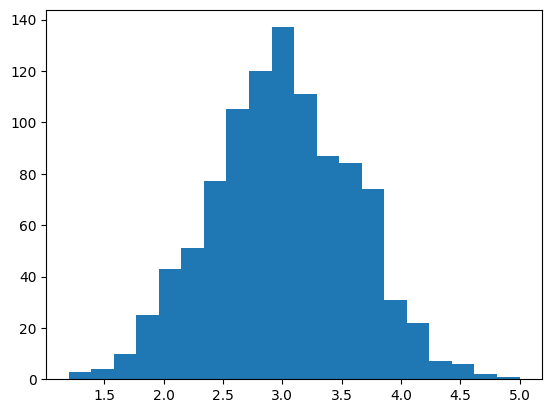

In [25]:
values = [1, 2, 3, 4, 5]

bootstrap_conf_interval(values, 1000, 0.95)

In [32]:
def bootstrap_conf_interval(data, num_samples, conf_interval):
    lower_quantile = (1 - conf_interval) / 2
    upper_quantile = 1 - lower_quantile
    bootstrap_samples = []
    bootstrap_samples = np.random.choice(data, (num_samples, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    plt.hist(bootstrap_means, bins=20)
    return bootstrap_means, np.quantile(bootstrap_means, [lower_quantile, upper_quantile])

array([1.8, 4.2])

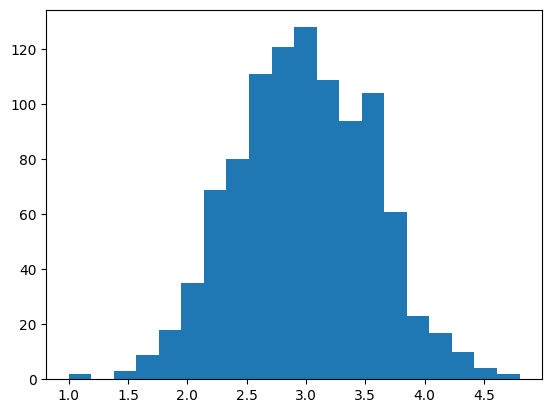

In [35]:
values = [1, 2, 3, 4, 5]

bootstrap_means, conf_int = bootstrap_conf_interval(values, 1000, 0.95)

conf_int

In [41]:
pd.Series(bootstrap_means).describe()

count    1000.000000
mean        2.988200
std         0.608038
min         1.000000
25%         2.600000
50%         3.000000
75%         3.400000
max         4.800000
dtype: float64

In [42]:
mean = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)
mean, std_dev

(2.9882, 0.6077341194963469)

In [45]:
within_1_std = np.sum((bootstrap_means >= mean - std_dev) & (bootstrap_means <= mean + std_dev))
within_2_std = np.sum((bootstrap_means >= mean - 2*std_dev) & (bootstrap_means <= mean + 2*std_dev))
within_3_std = np.sum((bootstrap_means >= mean - 3*std_dev) & (bootstrap_means <= mean + 3*std_dev))

total_points = len(bootstrap_means)
total_points

1000

In [46]:
perc_within_1_std = (within_1_std / total_points) * 100
perc_within_2_std = (within_2_std / total_points) * 100
perc_within_3_std = (within_3_std / total_points) * 100

print(f"Percentage of data within 1 standard deviation: {perc_within_1_std:.2f}%")
print(f"Percentage of data within 2 standard deviations: {perc_within_2_std:.2f}%")
print(f"Percentage of data within 3 standard deviations: {perc_within_3_std:.2f}%")


Percentage of data within 1 standard deviation: 64.30%
Percentage of data within 2 standard deviations: 97.00%
Percentage of data within 3 standard deviations: 99.80%
